In [3]:
import librosa
import numpy as np
import pandas as pd
import os
from sklearn.mixture import GaussianMixture as GMM
import csv
import time
import multiprocessing

import pickle

In [7]:
train_files = '/Users/asimadnan/Desktop/Mres/ASVSPOOF_DATA/LA/ASVspoof2019_LA_train/sample_train/'
train_labels = '/Users/asimadnan/Desktop/Mres/ASVSPOOF_DATA/LA/ASVspoof2019_LA_cm_protocols/ASVspoof2019.LA.cm.train.trn.txt'



In [187]:
la_train_labels = pd.read_csv(train_labels, delimiter = " ", header=None)
la_train_labels.columns = ['SPEAKER_ID','AUDIO_FILE_NAME','y','ATTACK_ID','KEY']



In [224]:
la_train_labels.shape

(25380, 5)

In [104]:
train_mfcc = '/Users/asimadnan/Desktop/Mres/ASVSPOOF_DATA/LA/ASVspoof2019_LA_train/mfcc_v1.csv'
dev_mfcc = '/Users/asimadnan/Desktop/Mres/ASVSPOOF_DATA/LA/ASVspoof2019_LA_dev/mfcc_v1.csv'
eval_mfcc = '/Users/asimadnan/Desktop/Mres/ASVSPOOF_DATA/LA/ASVspoof2019_LA_eval/mfcc_v1.csv'

dev_labels = '/Users/asimadnan/Desktop/Mres/ASVSPOOF_DATA/LA/ASVspoof2019_LA_cm_protocols/ASVspoof2019.LA.cm.eval.trl.txt'
eval_labels_path = '/Users/asimadnan/Desktop/Mres/ASVSPOOF_DATA/LA/ASVspoof2019_LA_cm_protocols/ASVspoof2019.LA.cm.eval.trl.txt'

In [232]:
la_train = pd.read_csv(train_mfcc, delimiter = ",", header=None)
la_train.shape

(25380, 602)

In [233]:
la_dev = pd.read_csv(dev_mfcc, delimiter = ",", header=None)
la_dev.shape

(24844, 602)

In [9]:
la_eval = pd.read_csv(eval_mfcc, delimiter = ",", header=None)
la_eval.shape

(17873, 602)

In [238]:
dev_labels = pd.read_csv(dev_labels, delimiter = " ", header=None)
dev_labels.shape

(71237, 5)

In [107]:
eval_labels = pd.read_csv(eval_labels_path, delimiter = " ", header=None)
eval_labels.shape
eval_labels

,0,1,2,3,4
0,LA_0039,LA_E_2834763,-,A11,spoof
1,LA_0014,LA_E_8877452,-,A14,spoof
2,LA_0040,LA_E_6828287,-,A16,spoof
3,LA_0022,LA_E_6977360,-,A09,spoof
4,LA_0031,LA_E_5932896,-,A13,spoof
...,...,...,...,...,...
71232,LA_0004,LA_E_1665632,-,-,bonafide
71233,LA_0038,LA_E_5085671,-,A09,spoof
71234,LA_0012,LA_E_4926022,-,A16,spoof
71235,LA_0052,LA_E_2894498,-,-,bonafide


In [ ]:
# GMM

In [258]:
la_train
X = la_train.drop([0,601], axis=1)
y = la_train[[601]]


In [259]:
gmm_bon = GMM(n_components = 144, covariance_type='diag',n_init = 50) # min shape[0] = 135 # max = 1112
# 2580 1112 337.8709302325581 289
gmm_sp  = GMM(n_components = 144, covariance_type='diag',n_init = 50)  # min shape[0] = 64  # max = 1318

In [260]:
bondata = []
spdata = []
feature_type = 'mfcc'
dest = '/Users/asimadnan/Desktop/Mres/Experiments/Models/'

In [263]:
bondata = la_train.loc[la_train[601] == 'bonafide']
spdata = la_train.loc[la_train[601] == 'spoof']

bondata = bondata.drop([0,601], axis=1)
spdata = spdata.drop([0,601], axis=1)


In [268]:
Xbon = np.vstack(bondata.values)
Xsp = np.vstack(spdata.values)

In [32]:
import time


In [43]:
now = datetime.now().time()
t = time.localtime()
current_time = time.strftime("%d-%m-%Y_%H-%M", time.localtime())
print(current_time)

17-03-2021_12-26


In [269]:
t0 = time.time()
gmm_bon.fit(Xbon)
print('Bon gmm trained, time spend:', time.time() - t0)

t0 = time.time()
gmm_sp.fit(Xsp)
print('Sp gmm trained, time spend:', time.time() - t0)

pickle.dump(gmm_bon, open(dest + 'bon_train' + '.gmm', 'wb'))
pickle.dump(gmm_sp, open(dest + 'sp_train' + '.gmm', 'wb'))
print('GMM model created')

Bon gmm trained, time spend: 414.075621843338
Sp gmm trained, time spend: 3769.10390996933


NameError: name 'pickle' is not defined

In [63]:
train_data_path = '/Users/asimadnan/Desktop/Mres/ASVSPOOF_DATA/LA/ASVspoof2019_LA_train/mfcc_test.csv'
train_label_path = '/Users/asimadnan/Desktop/Mres/ASVSPOOF_DATA/LA/ASVspoof2019_LA_cm_protocols/ASVspoof2019.LA.cm.train.trn.txt'
output_path = '/Users/asimadnan/Desktop/Mres/Experiments/Models/'

In [59]:
train_data = pd.read_csv(train_mfcc, delimiter = ",", header=None)
train_labels = pd.read_csv(train_label_path, delimiter = " ", header=None)
train_labels.columns = ['SPEAKER_ID','AUDIO_FILE_NAME','ENVIRONMENT_ID','ATTACK_ID','KEY']
X = train_data.drop([0,601], axis=1)
y = train_data[[601]]
gmm_bon = GMM(n_components = 144, covariance_type='diag',n_init = 50) # min shape[0] = 135 # max = 1112
gmm_sp  = GMM(n_components = 144, covariance_type='diag',n_init = 50)  # min shape[0] = 64  # max = 1318

bondata = []
spdata = []
feature_type = 'mfcc'

bondata = train_data.loc[train_data[601] == 'bonafide']
spdata = train_data.loc[train_data[601] == 'spoof']

bondata = bondata.drop([0,601], axis=1).sample(150)
spdata = spdata.drop([0,601], axis=1).sample(150)

Xbon = np.vstack(bondata.values)
Xsp = np.vstack(spdata.values)



In [61]:
current_time = time.strftime("%d-%m-%Y_%H-%M", time.localtime()) + ''

t0 = time.time()
gmm_bon.fit(Xbon)
print('Bon gmm trained, time spend:', time.time() - t0)




Bon gmm trained, time spend: 5.932121992111206


In [62]:
pickle.dump(gmm_bon, open(output_path + current_time +'_bon_train' + '.gmm', 'wb'))


In [ ]:
t0 = time.time()
gmm_sp.fit(Xsp)
print('Sp gmm trained, time spend:', time.time() - t0)
pickle.dump(gmm_sp, open(output_path + current_time + 'sp_train' + '.gmm', 'wb'))


print('GMM model created')

In [68]:
#SVM
from sklearn.svm import SVC
train_data_path = '/Users/asimadnan/Desktop/Mres/ASVSPOOF_DATA/LA/ASVspoof2019_LA_train/mfcc_test.csv'

train_data = pd.read_csv(train_data_path, delimiter = ",", header=None)
train_labels = pd.read_csv(train_label_path, delimiter = " ", header=None)
train_labels.columns = ['SPEAKER_ID','AUDIO_FILE_NAME','ENVIRONMENT_ID','ATTACK_ID','KEY']
X = train_data.drop([0,601], axis=1)
y = train_data[[601]]
svm = SVC(probability=True)
svm.fit(X, y)

/Users/asimadnan/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


SVC(probability=True)

In [70]:
eval_data_path = '/Users/asimadnan/Desktop/Mres/ASVSPOOF_DATA/LA/ASVspoof2019_LA_eval/mfcc_v1.csv'
eval_labels_path = '/Users/asimadnan/Desktop/Mres/ASVSPOOF_DATA/LA/ASVspoof2019_LA_cm_protocols/ASVspoof2019.LA.cm.eval.trl.txt'

eval_data = pd.read_csv(eval_data_path, delimiter = ",", header=None)
eval_labels =  pd.read_csv(eval_labels_path, delimiter = " ", header=None)

X_eval = eval_data.drop([0,601], axis=1)
y_eval = eval_data[[601]]

In [75]:
y_score = svm.decision_function(X_eval)
fpr, tpr, thresholds = roc_curve(y_eval, y_score,pos_label='spoof')
eer = brentq(lambda x : 1. - x - interp1d(fpr, tpr)(x), 0., 1.)
eer

0.1595976777724365

In [271]:
pickle.dump(gmm_bon, open(dest + 'bon_train' + '.gmm', 'wb'))
pickle.dump(gmm_sp, open(dest + 'sp_train' + '.gmm', 'wb'))
print('GMM model created')

GMM model created


In [2]:
model_path = '/Users/asimadnan/Desktop/Mres/Experiments/Models/'

In [85]:
gmm_bon = pickle.load(open(model_path + 'bon_train' + '.gmm','rb'))
gmm_sp  = pickle.load(open(model_path + 'sp_train' + '.gmm','rb'))

In [86]:
bondata_eval = la_eval.loc[la_eval[601] == 'bonafide']
spdata_eval = la_eval.loc[la_eval[601] == 'spoof']

bondata_eval = bondata_eval.drop([0,601], axis=1).values
spdata_eval = spdata_eval.drop([0,601], axis=1).values

In [87]:
gmm_bon.score([bondata_eval[0]])

-1800.6367789795681

In [88]:
predb = []
preds = []
j_bon = len(bondata_eval)
k_sp  = len(spdata_eval)

for i in range(j_bon):
    if (i % 50 == 0):
        print('Evaluating Bon sample at',i/j_bon * 100, '%')
    X = [bondata_eval[i]]
    bscore = gmm_bon.score(X)
    sscore = gmm_sp.score(X)

    #predb.append(np.exp(bscore)-np.exp(sscore))
    predb.append(bscore-sscore)

for i in range(k_sp):
    if (i % 50 == 0):
        print('Evaluating Sp sample at',i/k_sp * 100, '%')
    X = [spdata_eval[i]]
    bscore = gmm_bon.score(X)
    sscore = gmm_sp.score(X)

    #preds.append(np.exp(bscore)-np.exp(sscore))
    preds.append(bscore-sscore)

predb1 = np.asarray(predb)
preds1 = np.asarray(preds)



Evaluating Bon sample at 0.0 %
Evaluating Bon sample at 2.7262813522355507 %
Evaluating Bon sample at 5.452562704471101 %
Evaluating Bon sample at 8.178844056706652 %
Evaluating Bon sample at 10.905125408942203 %
Evaluating Bon sample at 13.631406761177752 %
Evaluating Bon sample at 16.357688113413303 %
Evaluating Bon sample at 19.083969465648856 %
Evaluating Bon sample at 21.810250817884405 %
Evaluating Bon sample at 24.53653217011996 %
Evaluating Bon sample at 27.262813522355504 %
Evaluating Bon sample at 29.98909487459106 %
Evaluating Bon sample at 32.715376226826606 %
Evaluating Bon sample at 35.44165757906216 %
Evaluating Bon sample at 38.16793893129771 %
Evaluating Bon sample at 40.89422028353326 %
Evaluating Bon sample at 43.62050163576881 %
Evaluating Bon sample at 46.346782988004364 %
Evaluating Bon sample at 49.07306434023992 %
Evaluating Bon sample at 51.79934569247546 %
Evaluating Bon sample at 54.52562704471101 %
Evaluating Bon sample at 57.25190839694656 %
Evaluating Bon 

Evaluating Sp sample at 46.13753974686701 %
Evaluating Sp sample at 46.44927988029179 %
Evaluating Sp sample at 46.76102001371657 %
Evaluating Sp sample at 47.07276014714134 %
Evaluating Sp sample at 47.38450028056612 %
Evaluating Sp sample at 47.6962404139909 %
Evaluating Sp sample at 48.00798054741568 %
Evaluating Sp sample at 48.31972068084045 %
Evaluating Sp sample at 48.631460814265225 %
Evaluating Sp sample at 48.94320094769001 %
Evaluating Sp sample at 49.25494108111479 %
Evaluating Sp sample at 49.56668121453956 %
Evaluating Sp sample at 49.878421347964334 %
Evaluating Sp sample at 50.19016148138912 %
Evaluating Sp sample at 50.501901614813896 %
Evaluating Sp sample at 50.813641748238666 %
Evaluating Sp sample at 51.12538188166344 %
Evaluating Sp sample at 51.43712201508822 %
Evaluating Sp sample at 51.748862148513 %
Evaluating Sp sample at 52.060602281937776 %
Evaluating Sp sample at 52.37234241536255 %
Evaluating Sp sample at 52.68408254878732 %
Evaluating Sp sample at 52.995

In [89]:
bondata_eval = la_eval.loc[la_eval[601] == 'bonafide'][[0]]
spdata_eval = la_eval.loc[la_eval[601] == 'spoof'][[0]]



In [19]:
spp

array([-1827.31082972, -2782.35803717, -1716.01426826, ...,
       -2401.66832556, -1212.82940225, -2714.21951619])

In [90]:
bondata_eval["score"] = predb1
spdata_eval["score"] = preds1

In [22]:
spdata_eval.head()

,0,score
0,LA_E_7338223,-1827.310830
1,LA_E_9469091,-2782.358037
2,LA_E_1788336,-1716.014268
3,LA_E_6616286,-0.124108
4,LA_E_1222387,-2280.597529


In [91]:
final_score = pd.concat([spdata_eval,bondata_eval])

In [24]:
final_score.head()

,0,score
0,LA_E_7338223,-1827.310830
1,LA_E_9469091,-2782.358037
2,LA_E_1788336,-1716.014268
3,LA_E_6616286,-0.124108
4,LA_E_1222387,-2280.597529


In [92]:
y_score = final_score[['score']].values.tolist()

In [26]:
y_score

[[-1827.3108297194435],
 [-2782.3580371703156],
 [-1716.014268263269],
 [-0.12410830295743835],
 [-2280.5975291972086],
 [-1905.662952418806],
 [-2284.157402775779],
 [-2248.9290935119716],
 [-2042.3602539286462],
 [9.615704907284226],
 [-2067.346692037669],
 [-2377.6373358997253],
 [-54.83757714094281],
 [-2607.8697453570476],
 [-2324.923015505225],
 [-14.204078609508997],
 [-2376.3319805319775],
 [-2494.952801035737],
 [-3036.1817827616137],
 [-9.846269257397353],
 [-2393.9472748957915],
 [-2075.0618073347773],
 [73.16947352972193],
 [-2637.316677311385],
 [-2014.1523270178827],
 [-76.77293408266519],
 [-1928.8223346121235],
 [112.46100796569431],
 [-2245.2810173280554],
 [-2500.711923057119],
 [-2208.459701053052],
 [-1904.2142387589638],
 [-2318.2296044044706],
 [-2255.7153525038434],
 [-194.03240177575026],
 [42.70493857354904],
 [43.26296219300684],
 [-2041.1370222708515],
 [-2318.072527240151],
 [-3016.984406962146],
 [-5.129111461014418],
 [66.35953106582656],
 [248.86530388654

In [93]:
y = la_eval[[601]].values.tolist()

In [94]:
y

[['spoof'],
 ['spoof'],
 ['spoof'],
 ['spoof'],
 ['spoof'],
 ['bonafide'],
 ['spoof'],
 ['spoof'],
 ['spoof'],
 ['spoof'],
 ['spoof'],
 ['spoof'],
 ['spoof'],
 ['spoof'],
 ['spoof'],
 ['spoof'],
 ['spoof'],
 ['spoof'],
 ['bonafide'],
 ['spoof'],
 ['spoof'],
 ['spoof'],
 ['bonafide'],
 ['spoof'],
 ['spoof'],
 ['spoof'],
 ['spoof'],
 ['spoof'],
 ['bonafide'],
 ['bonafide'],
 ['spoof'],
 ['spoof'],
 ['bonafide'],
 ['bonafide'],
 ['bonafide'],
 ['spoof'],
 ['spoof'],
 ['spoof'],
 ['spoof'],
 ['spoof'],
 ['bonafide'],
 ['spoof'],
 ['spoof'],
 ['spoof'],
 ['spoof'],
 ['spoof'],
 ['spoof'],
 ['spoof'],
 ['spoof'],
 ['spoof'],
 ['spoof'],
 ['spoof'],
 ['spoof'],
 ['spoof'],
 ['spoof'],
 ['spoof'],
 ['spoof'],
 ['spoof'],
 ['spoof'],
 ['spoof'],
 ['bonafide'],
 ['bonafide'],
 ['bonafide'],
 ['spoof'],
 ['spoof'],
 ['spoof'],
 ['spoof'],
 ['spoof'],
 ['spoof'],
 ['spoof'],
 ['spoof'],
 ['spoof'],
 ['spoof'],
 ['bonafide'],
 ['spoof'],
 ['spoof'],
 ['spoof'],
 ['spoof'],
 ['spoof'],
 ['spoof'],
 

In [95]:
from sklearn.metrics import roc_auc_score, roc_curve
from scipy.optimize import brentq
from scipy.interpolate import interp1d



In [96]:
fpr, tpr, thresholds = roc_curve(y, y_score, pos_label='spoof')
eer = brentq(lambda x : 1. - x - interp1d(fpr, tpr)(x), 0., 1.)
print ('EER', eer)

EER 0.4989094874583328


In [97]:
final_score[['score']]

,score
0,-1827.310830
1,-2782.358037
2,-1716.014268
3,-0.124108
4,-2280.597529
...,...
17841,20.822824
17844,204.465933
17846,11.243683
17850,112.628749


In [ ]:
def eer(model,X,y):
    y_score = model.decision_function(X)
    fpr, tpr, thresholds = roc_curve(y, y_score, pos_label='spoof')
    eer = brentq(lambda x : 1. - x - interp1d(fpr, tpr)(x), 0., 1.)
    thresh = interp1d(fpr, thresholds)(eer)
    print ('EER', eer)

In [328]:
eval_asv_score_path = '/Users/asimadnan/Desktop/Mres/ASVSPOOF_DATA/LA/ASVspoof2019_LA_asv_scores/ASVspoof2019.LA.asv.eval.gi.trl.scores.txt'

In [329]:
eval_asv_score = pd.read_csv(eval_asv_score_path, delimiter = " ", header=None)
eval_asv_score.columns = ['CM_KEY','ASV_KEY','SCORES']
eval_asv_score

,CM_KEY,ASV_KEY,SCORES
0,bonafide,target,7.981530
1,bonafide,target,22.408420
2,bonafide,target,25.735920
3,bonafide,target,26.003140
4,bonafide,target,3.467947
...,...,...,...
102574,A18,spoof,-12.137650
102575,A19,spoof,2.121193
102576,A17,spoof,-29.728380
102577,A18,spoof,-12.865140


In [292]:
len(predb1)
len(preds1)
predb1

array([197.98901579,  58.43943915,  32.95567251, ...,  11.24368288,
       112.62874853, 103.17562945])

In [287]:
predb1[predb1 < 0] = 0
predb1[predb1 > 0] = 1
predbresult1 = np.sum(predb1)
print(predbresult1, 'Bon samples were CORRECTLY evaluated out of', j_bon,'samples. Bon_Accuracy = ', predbresult1/j_bon )# 0.7356


preds1[preds1 > 0] = 0
preds1[preds1 < 0] = 1
predsresult = np.sum(preds1)
print(predsresult, 'Sp samples were CORRECTLY evaluated out of', k_sp, 'samples. Sp_Accuracy = ', predsresult/k_sp)# 0.4092

print('Total GMM Classifier Accuracy = ',(predbresult1 + predsresult)/(j_bon + k_sp))

1288.0 Bon samples were CORRECTLY evaluated out of 1834 samples. Bon_Accuracy =  0.7022900763358778
14038.0 Sp samples were CORRECTLY evaluated out of 16039 samples. Sp_Accuracy =  0.8752415986034042
Total GMM Classifier Accuracy =  0.8574945448441784


In [98]:
final_score

,0,score
0,LA_E_7338223,-1827.310830
1,LA_E_9469091,-2782.358037
2,LA_E_1788336,-1716.014268
3,LA_E_6616286,-0.124108
4,LA_E_1222387,-2280.597529
...,...,...
17841,LA_E_8797106,20.822824
17844,LA_E_3394900,204.465933
17846,LA_E_4215246,11.243683
17850,LA_E_9153255,112.628749


In [101]:
final_score = pd.concat([spdata_eval,bondata_eval])
final_score.columns = ['AUDIO_FILE_NAME','SCORE']
final_score.loc[final_score['SCORE'] > 0, 'Prediction'] = 'bonafide'
final_score.loc[final_score['SCORE'] < 0, 'Prediction'] = 'spoof'
final_score.head()

,AUDIO_FILE_NAME,SCORE,Prediction
0,LA_E_7338223,-1827.310830,spoof
1,LA_E_9469091,-2782.358037,spoof
2,LA_E_1788336,-1716.014268,spoof
3,LA_E_6616286,-0.124108,spoof
4,LA_E_1222387,-2280.597529,spoof


In [108]:
eval_labels.columns = ['SPEAKER_ID','AUDIO_FILE_NAME','ENVIRONMENT_ID','ATTACK_ID','KEY']
eval_labels.head()

,SPEAKER_ID,AUDIO_FILE_NAME,ENVIRONMENT_ID,ATTACK_ID,KEY
0,LA_0039,LA_E_2834763,-,A11,spoof
1,LA_0014,LA_E_8877452,-,A14,spoof
2,LA_0040,LA_E_6828287,-,A16,spoof
3,LA_0022,LA_E_6977360,-,A09,spoof
4,LA_0031,LA_E_5932896,-,A13,spoof


In [123]:
cm_score = pd.merge(final_score, eval_labels, on="AUDIO_FILE_NAME")
#cm_score_file = cm_score[['SPEAKER_ID','ATTACK_ID','Prediction','SCORE']]

In [346]:
#cm_score_file.to_csv('cm_score.txt',index=False,sep=" ",header=False)

In [144]:
cm_score.to_csv('cm_score_18-march.csv', index=False, sep="," ,header=True)

In [124]:
cm_score.loc[cm_score['Prediction'] == cm_score['KEY'], 'Stat'] = True
cm_score.loc[cm_score['Prediction'] != cm_score['KEY'], 'Stat'] = False

In [125]:
cm_score['Stat'].unique()

array([True, False], dtype=object)

In [150]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('seaborn')
%matplotlib inline





/Users/asimadnan/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:3762: UserWarning: catplot is a figure-level function and does not accept target axes. You may wish to try countplot
  warnings.warn(msg, UserWarning)


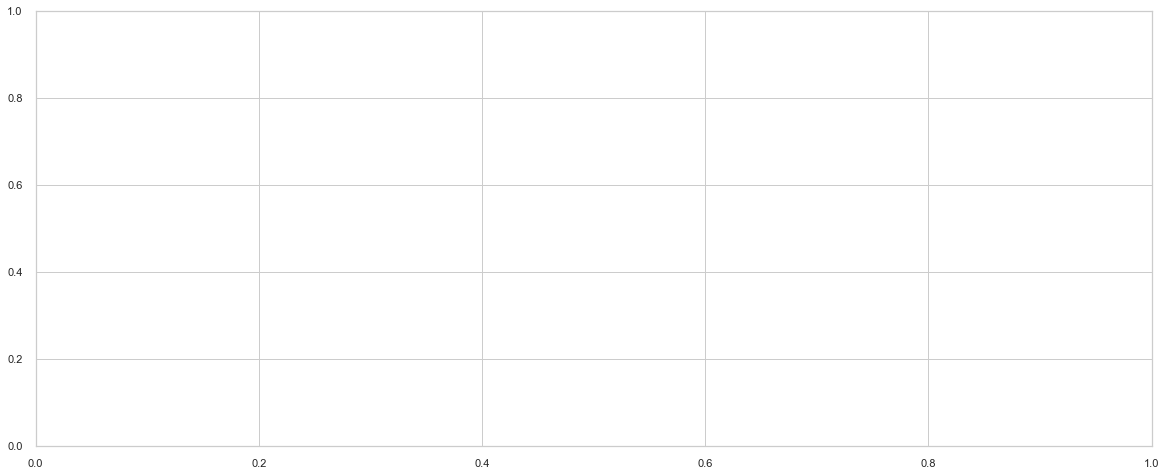

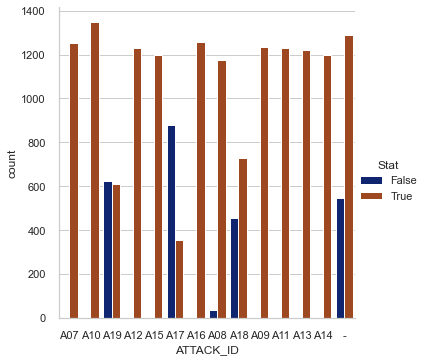

In [152]:
sns.set_theme(style="whitegrid")
a4_dims = (20, 8)
fig, ax = plt.subplots(figsize=a4_dims)
#sns.set(rc={'figure.figsize':(20, 8)})
ax = sns.catplot(ax=ax,x="ATTACK_ID", kind="count", hue="Stat",  data=cm_score,palette=sns.color_palette('dark', n_colors=3))


In [244]:
file_out_path = '/Users/asimadnan/Desktop/Mres/ASVSPOOF_DATA/LA/ASVspoof2019_LA_train/mfcc_test.csv'

features = []
max_len = 30
ff
total_files = len(os.listdir(train_files))
i = 1


In [251]:
i = 1
with open(file_out_path, "w") as f:
    writer = csv.writer(f,delimiter=',',lineterminator='\n')

    t_loop_start = time.time()
    for filepath in os.listdir(train_files):
        t_row_start = time.time()
        filename = filepath.split('.')[0]
        if filename not in la_train_labels.values[:, 1]: # checking if filename exists in label file
            print('File not Found in Label File')
            continue
        file_index = np.where(la_train_labels.values== filename)[0][0]    
        #print("Filename:", os.path.join(train_files, filepath))
        signal, sampling_rate = librosa.load(train_files + filepath)
        #print(sampling_rate)
        mfcc = librosa.feature.mfcc(y=signal, sr=sampling_rate)

        feature_t = np.transpose(mfcc)
        num_dim = feature_t.shape[1]
        length = len(feature_t)
        if length > max_len:
            feature_f = feature_t[:max_len]
        elif length < max_len:
            # add zero's if len < max lenght, taken this max_len from an existing implemntation, maybe need to change
            feature_f = np.concatenate((feature_t, np.array([[0.]*num_dim]*(max_len-length))), axis=0)
        feature_row = feature_f.reshape(-1).tolist()
        #print(len(feature_row))
        feature_row.append(la_train_labels.values[file_index][4])
        feature_row.insert(0, filename)

        features.append(feature_row)
        writer.writerow(feature_row)

        t_row_end = time.time()

        row_time = t_row_end - t_row_start
        files_left = (total_files- i)
        total_time = t_row_end - t_loop_start
        row_avg = total_time/i
        est_time_left = row_avg * (total_files - i)


        print(i, 'of', total_files, 'Processed,',round( ((i/total_files)*100),2 ),'%', 
              ',Est Time Left:', round(est_time_left/60,2),
              'Mins, time spent so far',round((t_row_end - t_loop_start)/60,2),
              'Avg Per Row Time',round(row_avg,2), 's')
        i=i+1
    t_loop_end = time.time()
    print('Total Time Taken ', round((t_loop_end-t_loop_start),2), 'Seconds, Avg time per row',round(((t_loop_end-t_loop_start)/i),2))

1 of 6 Processed, 16.67 % ,Est Time Left: 0.04 Mins, time spent so far 0.01 Avg Per Row Time 0.44 s
2 of 6 Processed, 33.33 % ,Est Time Left: 0.02 Mins, time spent so far 0.01 Avg Per Row Time 0.3 s
3 of 6 Processed, 50.0 % ,Est Time Left: 0.01 Mins, time spent so far 0.01 Avg Per Row Time 0.23 s
4 of 6 Processed, 66.67 % ,Est Time Left: 0.01 Mins, time spent so far 0.01 Avg Per Row Time 0.2 s
5 of 6 Processed, 83.33 % ,Est Time Left: 0.0 Mins, time spent so far 0.02 Avg Per Row Time 0.19 s
6 of 6 Processed, 100.0 % ,Est Time Left: 0.0 Mins, time spent so far 0.02 Avg Per Row Time 0.19 s
Total Time Taken  1.15 Seconds, Avg time per row 0.16


In [247]:
get_meff(file_out_path,train_files,la_train_labels)

1 of 6 Processed, 16.67 % ,Est Time Left: 0.01 Mins, time spent so far 0.0 Avg Per Row Time 0.1 s
2 of 6 Processed, 33.33 % ,Est Time Left: 0.01 Mins, time spent so far 0.0 Avg Per Row Time 0.1 s
3 of 6 Processed, 50.0 % ,Est Time Left: 0.01 Mins, time spent so far 0.01 Avg Per Row Time 0.12 s
4 of 6 Processed, 66.67 % ,Est Time Left: 0.0 Mins, time spent so far 0.01 Avg Per Row Time 0.13 s
5 of 6 Processed, 83.33 % ,Est Time Left: 0.0 Mins, time spent so far 0.01 Avg Per Row Time 0.14 s
6 of 6 Processed, 100.0 % ,Est Time Left: 0.0 Mins, time spent so far 0.01 Avg Per Row Time 0.13 s
Total Time Taken  0.77 Seconds, Avg time per row 0.11


In [248]:
def multiprocessing_func(file_out_path,train_files,la_train_labels):
    time.sleep(2)
    get_meff(file_out_path,train_files,la_train_labels)

In [249]:
if __name__ == '__main__':
    starttime = time.time()
    processes = []

    p = multiprocessing.Process(target=multiprocessing_func, args=(file_out_path,train_files,la_train_labels))
    processes.append(p)
    p.start()
        
    for process in processes:
        process.join()

KeyboardInterrupt: 

In [250]:
import time
import multiprocessing
def is_prime(n):
      if (n <= 1) : 
          return 'not a prime number'
      if (n <= 3) : 
          return 'prime number'
          
      if (n % 2 == 0 or n % 3 == 0) : 
          return 'not a prime number'
    
      i = 5
      while(i * i <= n) : 
          if (n % i == 0 or n % (i + 2) == 0) : 
              return 'not a prime number'
          i = i + 6
    
      return 'prime number'
def multiprocessing_func(x):
    time.sleep(2)
    print('{} is {} number'.format(x, is_prime(x)))
    
if __name__ == '__main__':
    starttime = time.time()
    processes = []
    for i in range(1,10):
        p = multiprocessing.Process(target=multiprocessing_func, args=(i,))
        processes.append(p)
        p.start()
        
    for process in processes:
        process.join()
        
    print()    
    print('Time taken = {} seconds'.format(time.time() - starttime))


Time taken = 0.7339620590209961 seconds


In [203]:
ff

['LA_T_2361751',
 -551.235107421875,
 28.366321563720703,
 26.904769897460938,
 24.82605743408203,
 22.447601318359375,
 19.945920944213867,
 17.3449764251709,
 14.627218246459961,
 11.860616683959961,
 9.230694770812988,
 6.953351020812988,
 5.148382186889648,
 3.785722255706787,
 2.7522072792053223,
 1.979970097541809,
 1.5218030214309692,
 1.501400351524353,
 1.9736948013305664,
 2.811986207962036,
 3.7244579792022705,
 -553.2172241210938,
 25.746496200561523,
 24.72983169555664,
 23.118698120117188,
 21.025766372680664,
 18.587364196777344,
 15.948328018188477,
 13.249151229858398,
 10.616931915283203,
 8.160447120666504,
 5.967820167541504,
 4.105415344238281,
 2.6162655353546143,
 1.5179784297943115,
 0.8009222745895386,
 0.4283280372619629,
 0.3398301601409912,
 0.4590610861778259,
 0.7043025493621826,
 1.0001932382583618,
 -554.4674072265625,
 23.775157928466797,
 22.222658157348633,
 19.93691635131836,
 17.273632049560547,
 14.573209762573242,
 12.073784828186035,
 9.868713378

In [190]:
file_out_path = '/Users/asimadnan/Desktop/Mres/ASVSPOOF_DATA/LA/ASVspoof2019_LA_train/'

with open(file_out_path + 'features.csv', "w", newline="") as f:
    writer = csv.writer(f)
    writer.writerows(features)

In [179]:
features[0].shape
la_train_labels.values.shape
'LA_T_1138215' in la_train_labels.values[:, 1]

(50, 20)

In [170]:
len(aa)

3950

In [143]:
gmm_bon = GMM(n_components = 144, covariance_type='diag',n_init = 50) # min shape[0] = 135 # max = 1112
gmm_sp  = GMM(n_components = 144, covariance_type='diag',n_init = 50)  # min shape[0] = 64  # max = 1318

In [160]:
bondata = []
spdata = []
feature_type = 'mfcc'
dest = '/Users/asimadnan/Desktop/Mres/Experiments/Models/'

In [161]:
#seperate bonafide and spoof data for 2 GMMS
for feature,filename,label in final_data:
    if (label == 'bonafide'):
        #i += 1
        bondata.append(feature)
    elif(label == 'spoof'):
        spdata.append(feature)
    

In [162]:
Xbon = np.vstack(bondata)
print('Bon feature stacked, shape as: ', Xbon.shape)
Xsp = np.vstack(spdata)
print('Sp feature stacked, shape as: ', Xsp.shape)

Bon feature stacked, shape as:  (3, 1000)
Sp feature stacked, shape as:  (3, 1000)


In [112]:
features[0][0].shape

(20, 100)

In [115]:
len(features[0][0])

20

In [113]:
pd.DataFrame(data=features[0][0])

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,-551.235107,-553.217224,-554.467407,-553.723389,-557.227051,-558.310974,-557.043152,-556.465088,-556.485718,-557.881042,...,-437.631683,-372.205048,-321.854675,-294.829742,-291.342529,-308.167084,-340.274841,-407.162872,-491.195892,-527.351990
1,28.366322,25.746496,23.775158,24.574547,19.696026,18.196518,19.958418,20.815399,20.848114,18.903114,...,-15.073683,-18.616821,-8.371799,6.737293,21.140430,37.390320,55.999847,69.897713,75.487823,52.443794
2,26.904770,24.729832,22.222658,22.359060,17.715321,16.359125,18.004087,18.924038,19.117283,17.289360,...,8.217652,-14.679516,-33.391384,-46.571083,-60.533279,-58.071423,-41.000633,-19.073334,16.455784,31.093760
3,24.826057,23.118698,19.936916,19.244921,15.006641,13.987896,15.371122,16.242851,16.641663,15.092255,...,12.823214,10.070377,15.170005,24.493111,18.799023,13.258192,12.611596,0.409822,-5.083149,14.448299
4,22.447601,21.025766,17.273632,15.875332,12.219442,11.757902,12.672213,13.248064,13.861832,12.810579,...,-30.583443,-49.443638,-62.021118,-57.777580,-41.912464,-28.238503,-26.111090,-24.514397,-2.596131,7.119341
5,19.945921,18.587364,14.573210,12.802100,9.891603,10.097176,10.309633,10.290046,11.141396,10.795897,...,46.421955,41.780373,25.717718,15.318632,14.353361,20.391747,21.276455,10.929760,1.106476,4.286587
6,17.344976,15.948328,12.073785,10.322955,8.278087,9.027128,8.347827,7.517398,8.675689,9.138205,...,-24.838734,-43.091309,-47.592876,-51.628551,-51.838993,-44.592506,-29.875458,-13.253798,-4.187895,4.246969
7,14.627218,13.249151,9.868713,8.439388,7.310728,8.227248,6.587021,4.940468,6.498029,7.697647,...,24.668674,24.617886,23.736544,23.796532,22.547592,14.822548,1.113088,-8.282784,-4.110465,8.638052
8,11.860617,10.616932,7.919743,6.940048,6.695029,7.267661,4.772885,2.570363,4.560843,6.248882,...,-11.048569,-17.561525,-26.830612,-23.794670,-11.679419,-2.919087,-0.138705,5.344200,8.138214,13.697525
9,9.230695,8.160447,6.115484,5.558606,6.088627,5.866244,2.802913,0.523641,2.830508,4.646896,...,12.920789,11.968887,11.031855,0.520792,-2.759276,-5.233954,-9.978817,-9.433331,5.790260,12.498693


In [73]:
mfcc_sample.shape

(20, 79)

In [20]:
filename = librosa.example('nutcracker')
y, sr = librosa.load(path)


In [84]:
np.where(la_train_labels.values=='LA_T_2361751')[0][0]

18

In [89]:
la_train_labels.values[18][4]

'bonafide'

In [22]:
# Separate harmonics and percussives into two waveforms
y_harmonic, y_percussive = librosa.effects.hpss(y)

In [23]:
# Beat track on the percussive signal
tempo, beat_frames = librosa.beat.beat_track(y=y_percussive,sr=sr)

In [24]:
# Compute MFCC features from the raw signal
mfcc = librosa.feature.mfcc(y=y, sr=sr, hop_length=hop_length, n_mfcc=13)


In [27]:
mfcc.shape

(13, 108)

In [30]:
mfcc

array([[-5.7725134e+02, -5.7443140e+02, -5.6305115e+02, ...,
        -5.9215002e+02, -5.9236627e+02, -5.9290540e+02],
       [ 2.2329237e+01,  2.6190737e+01,  3.9650543e+01, ...,
         1.7013292e+00,  1.3962271e+00,  6.3580132e-01],
       [ 2.1114815e+01,  2.4584599e+01,  3.2721329e+01, ...,
         1.6894166e+00,  1.3865058e+00,  6.3220859e-01],
       ...,
       [ 6.8366833e+00,  4.0916414e+00, -1.7278962e+00, ...,
         1.3242446e+00,  1.0884244e+00,  5.2080083e-01],
       [ 5.0499392e+00,  2.3161101e+00, -2.1820407e+00, ...,
         1.2484130e+00,  1.0265031e+00,  4.9732968e-01],
       [ 3.5925984e+00,  9.7300601e-01, -3.7069716e+00, ...,
         1.1669822e+00,  9.6000022e-01,  4.7198355e-01]], dtype=float32)

In [31]:
df = pd.DataFrame(data=mfcc)
df

,0,1,2,3,4,5,6,7,8,9,...,98,99,100,101,102,103,104,105,106,107
0,-577.251343,-574.431396,-563.051147,-545.598083,-551.294067,-418.369843,-347.876984,-247.094391,-167.910172,-176.151443,...,-571.478149,-560.026245,-566.824036,-589.923218,-590.388428,-590.893127,-591.665833,-592.150024,-592.366272,-592.905396
1,22.329237,26.190737,39.650543,51.616810,48.545898,91.751129,92.709503,134.890167,149.924011,146.335907,...,29.481430,36.212006,28.096390,4.843446,4.187057,3.474866,2.384439,1.701329,1.396227,0.635801
2,21.114815,24.584599,32.721329,27.145979,28.697990,-13.040560,-36.155354,-39.356445,-62.148193,-65.861000,...,25.708382,16.747969,11.844942,4.810560,4.158680,3.451093,2.367821,1.689417,1.386506,0.632209
3,19.437206,22.232470,25.836233,19.065804,17.651125,28.952459,43.710968,70.688187,72.539665,69.117401,...,21.026657,8.849477,6.575434,4.755957,4.111564,3.411619,2.340224,1.669631,1.370359,0.626238
4,17.627996,19.483822,19.500792,16.999603,14.874973,15.261661,5.743208,9.851320,3.295689,9.542868,...,16.760012,12.032352,10.798122,4.679940,4.045965,3.356657,2.301792,1.642074,1.347869,0.617907
5,15.892206,16.629780,13.765924,12.041586,13.775722,11.694130,9.018446,-7.081094,-12.026428,-8.175545,...,13.449207,11.757940,10.358810,4.582927,3.962244,3.286511,2.252740,1.606890,1.319156,0.607256
6,14.246410,13.837147,9.794383,11.724621,13.540888,-11.011059,-17.716570,-25.598850,-33.235622,-34.596092,...,10.824013,4.192137,2.021859,4.465464,3.860864,3.201563,2.193321,1.564261,1.284363,0.594316
7,12.575865,11.161027,6.808388,12.703932,10.516325,-14.721930,-7.322502,-8.718969,-9.394810,-12.740625,...,8.369122,-0.597394,-3.598624,4.328204,3.742383,3.102280,2.123855,1.514406,1.243670,0.579140
8,10.764237,8.612143,3.004765,3.522508,1.202287,-6.009192,-1.210608,-15.595279,-27.620579,-25.285521,...,5.944611,3.490692,0.296376,4.171908,3.607454,2.989201,2.044710,1.457584,1.197282,0.561785
9,8.807026,6.226609,-0.479181,-8.775867,-5.504288,-7.963610,-10.893322,-11.059959,-3.745290,-0.407229,...,3.938116,9.545652,7.134342,3.997436,3.456811,2.862947,1.956314,1.394088,1.145449,0.542313


# t-DCF analysis

In [348]:
asv_score_path = '/Users/asimadnan/Desktop/Mres/tDCF_python_v1/scores/asv_dev.txt'
cm_score_path = '/Users/asimadnan/Desktop/Mres/tDCF_python_v1/scores/cm_dev.txt'

In [349]:
asv_score = pd.read_csv(asv_score, delimiter = " ", header=None)
asv_score



,0,1,2
0,-,target,13.192462
1,-,target,3.060080
2,-,target,2.159984
3,-,target,9.826712
4,-,target,10.034062
...,...,...,...
20359,VC_4,spoof,-3.275694
20360,VC_1,spoof,3.226777
20361,VC_4,spoof,0.647864
20362,VC_1,spoof,3.212913


In [364]:
len(asv_score.iloc[:, 1].unique())

3

In [350]:
cm_score = pd.read_csv(cm_score_path, delimiter = " ", header=None)
cm_score

,0,1,2,3
0,p253/p253_237,-,bonafide,0.686820
1,p253/p253_238,-,bonafide,0.656938
2,p253/p253_239,-,bonafide,0.456656
3,p253/p253_240,-,bonafide,0.556069
4,p253/p253_241,-,bonafide,0.551408
...,...,...,...,...
20359,VC_4/p335_p330_408,VC_4,spoof,0.281920
20360,VC_1/p335_p330_410,VC_1,spoof,-0.510974
20361,VC_4/p335_p330_410,VC_4,spoof,0.114277
20362,VC_1/p335_p330_415,VC_1,spoof,-0.458114


In [365]:
len(cm_score.iloc[:, 1].unique())

7

In [351]:
# so both sample files have same number of observation
# looks like the asv score file has 3 columns, first one looks like attack ID, 
# second one is final descision from ASV system
# third is the score given by the asv system

# now things get weird when we look at the sample file for CM score
# it has 4 columns,
# first one looks like some kind of unique identifier, but its not unique, so not entierly sure what that is
# maybe combination of column 1 and 2 is some unique identifer of each audio file
# 3rd and 4th are easy to understand, they are the CM predicted class, and score

In [ ]:
## Now we look at the ASV score file provided to us in 2019 dataset

In [366]:
la_asv_score_path = '/Users/asimadnan/Desktop/Mres/ASVSPOOF_DATA/LA/ASVspoof2019_LA_asv_scores/ASVspoof2019.LA.asv.eval.gi.trl.scores.txt'

In [367]:
la_asv_score = pd.read_csv(la_asv_score_path, delimiter = " ", header=None)
la_asv_score

,0,1,2
0,bonafide,target,7.981530
1,bonafide,target,22.408420
2,bonafide,target,25.735920
3,bonafide,target,26.003140
4,bonafide,target,3.467947
...,...,...,...
102574,A18,spoof,-12.137650
102575,A19,spoof,2.121193
102576,A17,spoof,-29.728380
102577,A18,spoof,-12.865140


In [ ]:
# what a weird format, 
# and 102579 rows in eval
# lets look at how many obs we have in eval set

In [369]:
eval_labels = '/Users/asimadnan/Desktop/Mres/ASVSPOOF_DATA/LA/ASVspoof2019_LA_cm_protocols/ASVspoof2019.LA.cm.eval.trl.txt'
eval_labels = pd.read_csv(eval_labels, delimiter = " ", header=None)
eval_labels


,0,1,2,3,4
0,LA_0039,LA_E_2834763,-,A11,spoof
1,LA_0014,LA_E_8877452,-,A14,spoof
2,LA_0040,LA_E_6828287,-,A16,spoof
3,LA_0022,LA_E_6977360,-,A09,spoof
4,LA_0031,LA_E_5932896,-,A13,spoof
...,...,...,...,...,...
71232,LA_0004,LA_E_1665632,-,-,bonafide
71233,LA_0038,LA_E_5085671,-,A09,spoof
71234,LA_0012,LA_E_4926022,-,A16,spoof
71235,LA_0052,LA_E_2894498,-,-,bonafide


In [ ]:
# only 71237 observations, now what is goin on here?????? 

In [ ]:
#ok maybe some issue in eval trials, lets look at the dev set

In [371]:
dev_labels_path = '/Users/asimadnan/Desktop/Mres/ASVSPOOF_DATA/LA/ASVspoof2019_LA_cm_protocols/ASVspoof2019.LA.cm.dev.trl.txt'
dev_labels = pd.read_csv(dev_labels_path, delimiter = " ", header=None)
dev_labels



,0,1,2,3,4
0,LA_0069,LA_D_1047731,-,-,bonafide
1,LA_0069,LA_D_1105538,-,-,bonafide
2,LA_0069,LA_D_1125976,-,-,bonafide
3,LA_0069,LA_D_1293230,-,-,bonafide
4,LA_0069,LA_D_1340209,-,-,bonafide
...,...,...,...,...,...
24839,LA_0078,LA_D_9924204,-,A06,spoof
24840,LA_0078,LA_D_9931163,-,A06,spoof
24841,LA_0078,LA_D_9935163,-,A06,spoof
24842,LA_0078,LA_D_9944718,-,A06,spoof


In [372]:
la_asv_score_dev_path = '/Users/asimadnan/Desktop/Mres/ASVSPOOF_DATA/LA/ASVspoof2019_LA_asv_scores/ASVspoof2019.LA.asv.dev.gi.trl.scores.txt'

asv_score_dev = pd.read_csv(la_asv_score_dev_path, delimiter = " ", header=None)
asv_score_dev


,0,1,2
0,bonafide,target,18.205270
1,bonafide,target,40.422080
2,bonafide,target,39.446650
3,bonafide,target,29.033480
4,bonafide,target,16.546570
...,...,...,...
29543,A06,spoof,12.837640
29544,A05,spoof,-11.607620
29545,A06,spoof,-16.560800
29546,A05,spoof,-5.262832


In [ ]:
# 24844 obs in dev files and 29548 obs in asv score files

In [ ]:
# lets compare PA eval set

In [77]:
PA_eval_asv_score_path = '/Users/asimadnan/Desktop/Mres/ASVSPOOF_DATA/PA/ASVspoof2019_PA_asv_scores/ASVspoof2019.PA.asv.eval.gi.trl.scores.txt'
PA_eval_labels = '/Users/asimadnan/Desktop/Mres/ASVSPOOF_DATA/PA/ASVspoof2019_PA_cm_protocols/ASVspoof2019.PA.cm.eval.trl.txt'


In [83]:
pa_eval_label = pd.read_csv(PA_eval_labels, delimiter = " ", header=None)
print(pa_eval_label.shape)
pa_eval_label.head()

(134730, 5)


,0,1,2,3,4
0,PA_0016,PA_E_0000001,cbc,-,bonafide
1,PA_0029,PA_E_0000002,bab,BB,spoof
2,PA_0044,PA_E_0000003,bac,BA,spoof
3,PA_0019,PA_E_0000004,cab,CC,spoof
4,PA_0021,PA_E_0000005,baa,AB,spoof


In [84]:
pa_eval_asv_score = pd.read_csv(PA_eval_asv_score_path, delimiter = " ", header=None)
print(pa_eval_asv_score.shape)
pa_eval_asv_score.head()


(253530, 3)


,0,1,2
0,bonafide,target,28.945390
1,bonafide,target,8.515785
2,bonafide,target,26.067930
3,bonafide,target,-14.083880
4,bonafide,target,21.399290
